In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.dates as mdates

In [30]:
folder_path = 'C:\\Users\\linti\\Desktop\\Advanced Data Science for Transport and Engineering\\Weekly_Data'
data_sensors_path = '\\0922_Sensor data_Utrecht.csv'
path = folder_path + data_sensors_path
data_sensors = pd.read_csv(path, delimiter=';')

In [31]:
data_sensors

,date,status,sensor id,location name,city name
0,2024-10-10 04:30:21+00:00,False,863213040201795,Lange Viestraat,Utrecht
1,2024-10-10 04:50:40+00:00,True,863213040198801,Stadhuisplein,Utrecht
2,2024-10-10 04:59:14+00:00,True,863213040198769,Lange Viestraat,Utrecht
3,2024-10-10 05:05:01+00:00,False,863213040206349,Domplein,Utrecht
4,2024-10-10 05:08:41+00:00,True,863213040200003,Lange Viestraat,Utrecht
...,...,...,...,...,...
140955,2025-06-17 10:18:00+00:00,False,863213040206976,Lange Viestraat,Utrecht
140956,2025-06-17 10:24:13+00:00,True,863213040212289,Lange Viestraat,Utrecht
140957,2025-06-17 10:31:52+00:00,True,863213040215340,Beurskwartier,Utrecht
140958,2025-06-17 10:35:12+00:00,True,863213040206976,Lange Viestraat,Utrecht


In [ ]:
counts = data_sensors['status'].value_counts()
proportions = data_sensors['status'].value_counts(normalize = True) * 100

140960

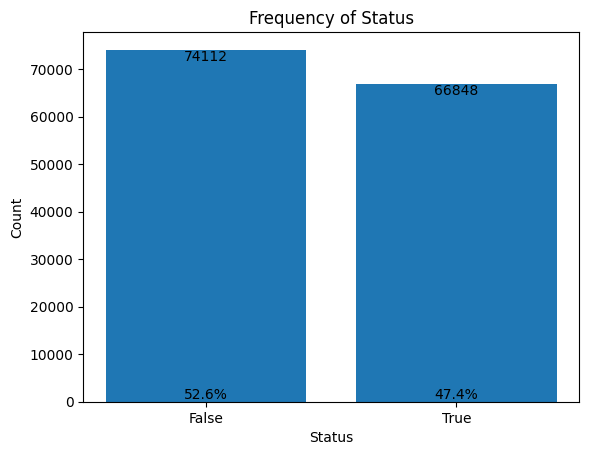

In [66]:
plt.bar(counts.index, counts.values)
plt.title("Frequency of Status")
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks([0, 1], ['False', 'True'])
# Add text labels on top of each bar
for i, value in enumerate(proportions.values):
    plt.text(i, value+counts.iloc[i], f'{counts.iloc[i]}', ha='center', va='top', fontsize=10)
    plt.text(i, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)
plt.show()

Create columns named "date" in YY-MM-DD, "time" in hh:mm:ss, and day in 0-6 where 0 denotes Monday and 6 denotes Sunday.

In [34]:
# Convert Timestamp column to datetime
data_sensors['date'] = pd.to_datetime(data_sensors['date'], errors='coerce', utc=True)
# print(data_sensors)
data_sensors['day'] = data_sensors['date'].dt.dayofweek

Create filters

In [35]:
def filter_by_location(data, loc):
    return data[data["location name"] == loc]
def filter_by_date(data, start_date, end_date): # can be multiple date gaps
    '''
    start_date, end_date should be 'YYYY-MM-DD' strings or datetime
    '''
    
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    return data[(data["date"].dt.date >= start_date.date()) &
                (data["date"].dt.date <= end_date.date())]

Custom ur filter here

In [36]:
def filter_by_masks(df):
    mask = False
    mask |= ((df["date"].dt.hour >= 0) &
             (df["date"].dt.hour < 24))

    return df[mask]

Change the start_date. Now the end_date is intended to be equal to start_date. This define the data in a single day. Further update should define the from a single day to a time period. 

In [ ]:
#Chose 22th Oct, 2024 for example
start_date = '2024-10-22'
end_date = start_date
df_loc = filter_by_location(data_sensors, "Neude")
df_date = filter_by_date(df_loc, start_date=start_date, end_date=end_date)
df_time = filter_by_masks(df_date)

3. Pick sensors in the location

In [38]:
def get_sensors(data):
    """Assumes 'sensor' column exists with sensor IDs/names"""
    return data["sensor id"].unique()

In [39]:
sensors = get_sensors(df_loc) # should be 2 sensors in the Piața Orizont

4. Plot one sensor's status over time

In [40]:
def plot_sensor(data, sensor_name, fig, ax, i, j = 0):
    sensor_data = data[data["sensor id"] == sensor_name]
    ax.step(sensor_data["date"], sensor_data["status"].astype(int))
    # Major ticks every hour
    fig.gca().xaxis.set_major_locator(mdates.HourLocator())
    fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    # day = sensor_data["day"]
    # Minor ticks every 15 minutes
    fig.gca().xaxis.set_minor_locator(mdates.MinuteLocator(byminute=[0,15,30,45]))
    # Show grid for both major and minor ticks
    ax.grid(which='major', linestyle='-', linewidth=0.8)
    ax.grid(which='minor', linestyle='--', linewidth=0.5, alpha=0.5)
    ax.set_title(f"Sensor: {sensor_name}, Date: {start_date}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Status (1=True, 0=False)")
    ax.grid(True, alpha=0.3)


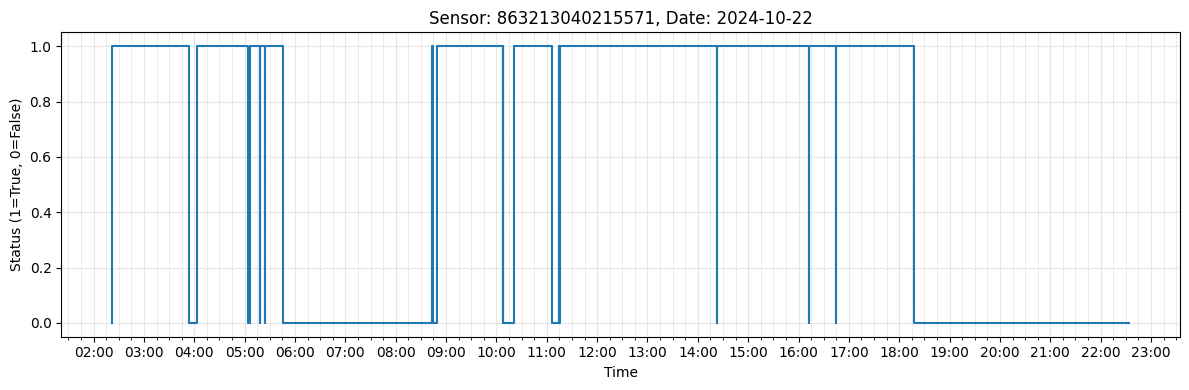

In [41]:
fig, axes = plt.subplots(len(sensors), 1, figsize=(12, 4*len(sensors)), sharex=True)
# Handle case where only one sensor (axes not iterable)
if len(sensors) == 1:
    axes = [axes]

for i, sensor in enumerate(sensors):
    plot_sensor(df_time, sensor, fig, ax=axes[i], i = i)
    # Save only the area of this Axes
save_path = folder_path + f"\\{start_date}.png"
fig.savefig(save_path, dpi = 200)
plt.tight_layout()
plt.show()

For multiple sensors, divide days by repeatedly calling the function filter_by_date and draw a plot with a single day. The rows of the subplot are the sensors. The columns of the subplot are the days. Each subplot shows the status of a single sensor on a single day, using your existing plotting style (step plot, hourly major ticks, 15-min minor ticks, etc.)

In [42]:
# days = pd.date_range(start=start_date, end=end_date, freq='D') # a list of days between end_date and start_date
# fig, axes = plt.subplots(len(sensors), len(days), figsize=(4*len(days), 3*len(sensors)), sharex=True)

# # Handle case where only one sensor (axes not iterable)
# if len(sensors) == 1:
#     axes = [axes]
# for j, day in enumerate(days):
#     df_date = filter_by_date(df_loc, start_date = day, end_date = day)
#     for i, sensor in enumerate(sensors):
#         plot_sensor(df_date, sensor, fig, ax=axes[i], i = i)

# plt.tight_layout()
# plt.show()